In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## 準備訓練資料(Prepare training data)

In [2]:
df_boston_housing = pd.read_csv('BostonHousing.csv')
print(df_boston_housing.keys())
df_boston_housing

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RN', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### 自變數（Independent variable） - X

In [3]:
# X = df_boston_housing.drop('MEDV', axis=1)
selected_columns = ['LSTAT','RN']
X = df_boston_housing.loc[:, selected_columns]
X

,LSTAT,RN
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


### 應變數（Dependent variable） - y

In [4]:
y = df_boston_housing['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

### 切割資料
把資料切割成訓練training data（80%）和測試testing data（20%）

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


## 模型訓練
new出一個LinearRegression的物件後，用特徵變數（自變數（Independent variable） - X）的訓練資料和目標變數（應變數（Dependent variable） - y）的訓練資料產生一個模型。

In [6]:
reg = LinearRegression()
reg.fit(X_train, y_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


LinearRegression()

## 預測結果Predicting using the linear model

In [7]:
y_pred = reg.predict(X_test)
print(len(y_pred))
y_pred

102


array([26.28587773, 24.25377886, 24.42060228, 13.11754087, 22.49511785,
       22.99636043, 21.40735689, 23.1439176 , 15.86631602, 24.49894913,
       15.66714802, 18.85052667, 19.48253539,  3.98290593, 37.34092175,
       31.60596506, 23.5941266 , 33.2950621 , 28.69055638, 22.88162089,
       26.85271393, 20.89975988, 20.81250528, 27.14537125, 21.08017113,
        9.74333537, 20.15512287, 17.56350171, 37.2052103 , 18.6688415 ,
       18.528333  , 20.17796936, 23.8988013 , 21.75587854, 25.59651746,
       18.79694526, 11.792485  , 22.93730323, 19.61654119, 14.43528526,
       24.42127312, 19.031016  , 24.1741034 , 14.58361474, 26.48547198,
       25.55656793, 17.94458882, 20.14812616,  4.60378383, 26.93655721,
       20.33112961, 16.17879073, 21.66465634, 38.61474899, 16.81321483,
       18.53552994, 19.74880245, 20.57255588, 21.52884614, 17.87655368,
       23.69717903, 21.63170868, 31.22593617, 29.7494804 , 18.25853524,
       29.24595764, 21.12607982, 17.92429807, 20.78992128, 21.71

### 真實結果：Y_test

In [8]:
print(len(y_test))
y_test

102


329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
56     24.7
455    14.1
60     18.7
213    28.1
108    19.8
Name: MEDV, Length: 102, dtype: float64

## 測試準確度

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 平均絕對誤差（MAE）
用來衡量預測值與真實值之間的平均絕對誤差，是一個非負值，MAE越小表示模型越好。

The mean absolute error (MAE) is used to measure the average absolute error between the predicted value and the true value. It is a non-negative value. The smaller the MAE, the better the model.

平均絶対誤差 (MAE) は、予測値と真の値の間の平均絶対誤差を測定するために使用されます。これは非負の値です。MAE が小さいほど、モデルは優れています。

In [10]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 4.142444656238562


### 均方誤差 MSE

In [11]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 37.383105638779966


### 均方根誤差 RMSE
均方根誤差（RMSE）是迴歸模型的典型指標，用於指示模型預測中會產生多大的誤差。 對於較大的誤差，權重較高。同樣的，RMSE越小越好。

In [12]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 6.114172522817783


### 平均絕對百分比誤差 MAPE
MAPE和MAE類似，只是在MAE的基礎上做了標準化處理。MAPE越小表示模型越好。

In [13]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test))
mape = MAPE(y_test, y_pred)
print("MAPE:", mape)

MAPE: 0.2165404536334355


### 評估指標 R2
sklearn實現線性迴歸時預設採用R2指標。 R2越大，表示模型越好。

R2的好處在於其結果進行歸一化，更容易看出模型間的差距。

* R2≤1
* R2越大越好。 當我們預測的模型完全準確時，R2等於最大值1
* 當R2＜0時，說明模型不如基準模型，很可能資料不存在任何線性關係

In [14]:
r2 = r2_score(y_test, y_pred)
print("r2:", r2)

r2: 0.5409084827186417


## Visualization

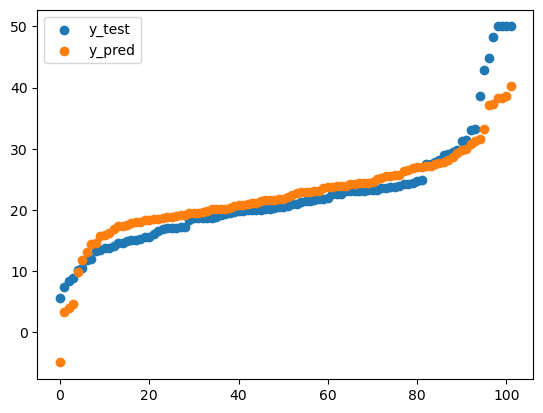

In [15]:
plt.scatter(range(len(y_test)), sorted(y_test), label='y_test')
plt.scatter(range(len(y_test)), sorted(y_pred), label='y_pred')
plt.legend()
plt.show()